# K-Means
The **KMeans** algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares.
The k-means algorithm divides a set of **N** samples **X** into **K** disjoint clusters , each described by the mean $\mu_j$ of the samples in the cluster. The means are commonly called the cluster “centroids”.
The **K-means** algorithm aims to choose centroids that minimize the inertia, or within-cluster sum-of-squares criterion:
$$\sum_{i=0}^n min_{\mu_j\in C}(\parallel x_i - \mu_j \parallel)^2$$

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import math
import random
import numpy as np
from sklearn import datasets,cluster
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Dataset

In [3]:
# dataset
iris = datasets.load_iris()
X = iris.data
labels = iris.target
X, labels

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [4]:
data_df = pd.DataFrame(X)
data_df['label'] = labels
data_df

,0,1,2,3,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
data_df.describe()

,0,1,2,3,label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 2. Visualize

Text(0.5, 0.98, 'visualize data distribution')

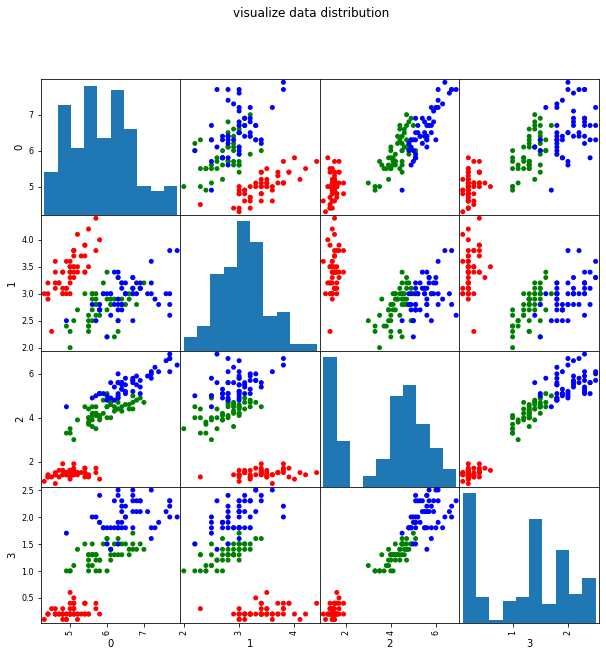

In [6]:
# visualize data distribution
from pandas.plotting import scatter_matrix

colors = np.array(['red', 'green', 'blue', 'yellow'])
scatter_matrix(data_df[[0,1,2,3]], s=100, alpha=1, c=colors[labels], figsize=(10,10))
plt.suptitle("visualize data distribution")

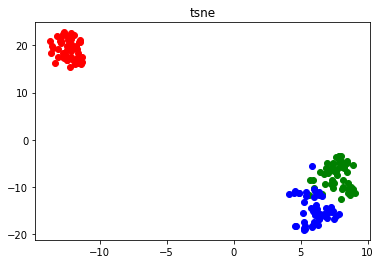

In [7]:
# tsne
from sklearn.manifold import TSNE
tsne = TSNE()
tsne.fit_transform(data_df[[0,1,2,3]]) #进行数据降维,并返回结果
X_tsne = pd.DataFrame(tsne.embedding_, index = data_df['label'])

n_label = 3
for i in range(n_label):
    d = X_tsne[X_tsne.index == i]
    plt.scatter(d[0], d[1], c=colors[i], marker='o')
plt.title('tsne')
plt.show()

## 3. K-means

In [8]:
X = data_df[[0,1,2,3]]
X

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
# using sklearn:https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
kmeans = cluster.KMeans(n_clusters=3).fit(X)
output = kmeans.labels_
centers = kmeans.cluster_centers_
output, centers

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
        0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
        0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2]),
 array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
        [5.006     , 3.428     , 1.462     , 0.246     ],
        [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]]))

In [10]:
data_df['cluster'] = kmeans.labels_
# data_df.sort_values('cluster')

print(data_df[data_df['label'] == 0])
print(data_df[data_df['label'] == 1])
print(data_df[data_df['label'] == 2])

      0    1    2    3  label  cluster
0   5.1  3.5  1.4  0.2      0        1
1   4.9  3.0  1.4  0.2      0        1
2   4.7  3.2  1.3  0.2      0        1
3   4.6  3.1  1.5  0.2      0        1
4   5.0  3.6  1.4  0.2      0        1
5   5.4  3.9  1.7  0.4      0        1
6   4.6  3.4  1.4  0.3      0        1
7   5.0  3.4  1.5  0.2      0        1
8   4.4  2.9  1.4  0.2      0        1
9   4.9  3.1  1.5  0.1      0        1
10  5.4  3.7  1.5  0.2      0        1
11  4.8  3.4  1.6  0.2      0        1
12  4.8  3.0  1.4  0.1      0        1
13  4.3  3.0  1.1  0.1      0        1
14  5.8  4.0  1.2  0.2      0        1
15  5.7  4.4  1.5  0.4      0        1
16  5.4  3.9  1.3  0.4      0        1
17  5.1  3.5  1.4  0.3      0        1
18  5.7  3.8  1.7  0.3      0        1
19  5.1  3.8  1.5  0.3      0        1
20  5.4  3.4  1.7  0.2      0        1
21  5.1  3.7  1.5  0.4      0        1
22  4.6  3.6  1.0  0.2      0        1
23  5.1  3.3  1.7  0.5      0        1
24  4.8  3.4  1.9  0.2   

In [11]:
# Adjusting Result Categories, if necessary.
data_df['cluster'][data_df['cluster'] == 1] = 0 + 3
data_df['cluster'][data_df['cluster'] == 2] = 1 + 3
data_df['cluster'][data_df['cluster'] == 0] = 2 + 3

data_df['cluster'] = data_df['cluster']%3
data_df.sort_values('cluster')

,0,1,2,3,label,cluster
0,5.1,3.5,1.4,0.2,0,0
27,5.2,3.5,1.5,0.2,0,0
28,5.2,3.4,1.4,0.2,0,0
29,4.7,3.2,1.6,0.2,0,0
30,4.8,3.1,1.6,0.2,0,0
...,...,...,...,...,...,...
120,6.9,3.2,5.7,2.3,2,2
122,7.7,2.8,6.7,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2
128,6.4,2.8,5.6,2.1,2,2


## 4. Metric
accuracy, Silhouette Coefficient

In [22]:
# accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(data_df['label'], data_df['cluster'])
print("The accuracy of your model is {}".format(acc))

The accuracy of your model is 0.8933333333333333


In [13]:
# Silhouette Coefficient 
from sklearn import metrics
score = metrics.silhouette_score(X, data_df['cluster'])
score

0.5528190123564091

## 5. Visualize the result

Text(0.5, 0.98, 'visualize the result')

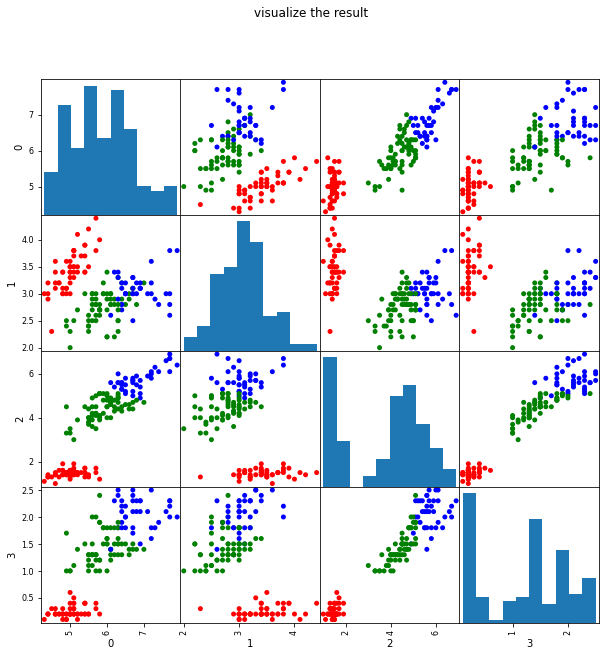

In [14]:
# visualize the result

colors = np.array(['red', 'green', 'blue', 'yellow'])
scatter_matrix(data_df[[0,1,2,3]], s=100, alpha=1, c=colors[data_df['cluster']], figsize=(10,10))
plt.suptitle("visualize the result")

# Scaled data

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [16]:
kmeans_scaled = cluster.KMeans(n_clusters=3).fit(X_scaled)
output_scaled = kmeans_scaled.labels_
centers_scaled = kmeans_scaled.cluster_centers_
output_scaled, centers_scaled

(array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0]),
 array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
        [ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
        [-1.01457897,  0.85326268, -1.30498732, -1.25489349]]))

In [17]:
data_df['cluster_scaled'] = kmeans_scaled.labels_


print(data_df[data_df['label'] == 0])
print(data_df[data_df['label'] == 1])
print(data_df[data_df['label'] == 2])

      0    1    2    3  label  cluster  cluster_scaled
0   5.1  3.5  1.4  0.2      0        0               2
1   4.9  3.0  1.4  0.2      0        0               2
2   4.7  3.2  1.3  0.2      0        0               2
3   4.6  3.1  1.5  0.2      0        0               2
4   5.0  3.6  1.4  0.2      0        0               2
5   5.4  3.9  1.7  0.4      0        0               2
6   4.6  3.4  1.4  0.3      0        0               2
7   5.0  3.4  1.5  0.2      0        0               2
8   4.4  2.9  1.4  0.2      0        0               2
9   4.9  3.1  1.5  0.1      0        0               2
10  5.4  3.7  1.5  0.2      0        0               2
11  4.8  3.4  1.6  0.2      0        0               2
12  4.8  3.0  1.4  0.1      0        0               2
13  4.3  3.0  1.1  0.1      0        0               2
14  5.8  4.0  1.2  0.2      0        0               2
15  5.7  4.4  1.5  0.4      0        0               2
16  5.4  3.9  1.3  0.4      0        0               2
17  5.1  3

In [18]:
# Adjusting Result Categories, if necessary.
data_df['cluster_scaled'][data_df['cluster_scaled'] == 2] = 0 + 3
data_df['cluster_scaled'][data_df['cluster_scaled'] == 0] = 1 + 3
data_df['cluster_scaled'][data_df['cluster_scaled'] == 1] = 2 + 3

data_df['cluster_scaled'] = data_df['cluster_scaled']%3
data_df.sort_values('cluster_scaled')

,0,1,2,3,label,cluster,cluster_scaled
0,5.1,3.5,1.4,0.2,0,0,0
27,5.2,3.5,1.5,0.2,0,0,0
28,5.2,3.4,1.4,0.2,0,0,0
29,4.7,3.2,1.6,0.2,0,0,0
30,4.8,3.1,1.6,0.2,0,0,0
...,...,...,...,...,...,...,...
86,6.7,3.1,4.7,1.5,1,1,2
120,6.9,3.2,5.7,2.3,2,2,2
85,6.0,3.4,4.5,1.6,1,1,2
124,6.7,3.3,5.7,2.1,2,2,2


In [19]:
# accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(data_df['label'], data_df['cluster_scaled'])
print("The accuracy of your model is {}".format(acc))

The accuracy of your model is 0.8333333333333334


In [20]:
# Silhouette Coefficient 
from sklearn import metrics
score = metrics.silhouette_score(X, data_df['cluster_scaled'])
score

0.5061527484935536

Text(0.5, 0.98, 'visualize the result')

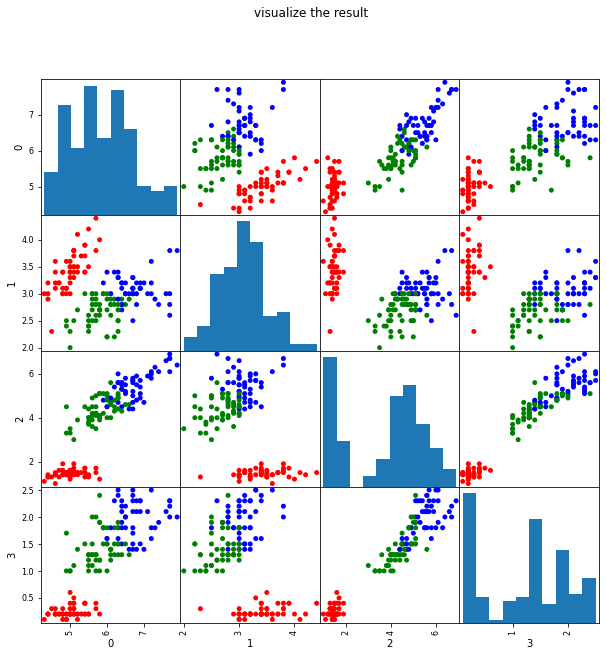

In [21]:
# visualize the result

colors = np.array(['red', 'green', 'blue', 'yellow'])
scatter_matrix(data_df[[0,1,2,3]], s=100, alpha=1, c=colors[data_df['cluster_scaled']], figsize=(10,10))
plt.suptitle("visualize the result")